# **Letter classification study using the K Nearest Neighbors model**

## **Introduction**

This is the main study of a letter classification using the EMNIST letters database avaiable in https://www.nist.gov/itl/products-and-services/emnist-dataset

## **Generate dataset**

This part contains the functions to read the dataset saved in the ".npy" files to use it in the machine learning algorithm created

In [1]:
import dataTools as dt
import numpy as np

In [2]:
def separate_array(data):    
    image = []
    labels = []
    for line in data:
        image.append(np.array(line[:-1]))
        labels.append(line[-1])
    
    return image, labels

In [3]:
X_train, Y_train = separate_array(np.load('./../train_classes.npy'))

In [4]:
X_validation, Y_validation = separate_array(np.load('./../validation_classes.npy'))

# **K-Nearest Neighbors algorithm created**

This section is presented the algorithme developped.

In [5]:
import knn
from sklearn.metrics import accuracy_score

In [6]:
def knn_train(num_neighbors, norm):
    print("Using " + str(num_neighbors) + " neighbors")
    print("Using the " + norm + " norm\n")
    predicted = []
    predicted = knn.k_nearest_neighbors(X_train, X_train, num_neighbors, norm)
    print predicted[0:10]
    print("The train accuracy is: " + str(round((accuracy_score(Y_train, predicted) * 100), 3)) + "%\n")
    
    return predicted

In [ ]:
%%time 

predicted_train_l2 = knn_train(4, 'l2')

Using 4 neighbors
Using the l2 norm



In [ ]:
%%time 
des éléments pour leur appliquer des actions.
predicted_train_l1 = knn_train(4, 'l1')

In [20]:
def knn_validation(num_neighbors, norm):
    print("Using " + str(num_neighbors) + " neighbors")
    print("Using the " + norm + " norm\n")
    predicted = knn.k_nearest_neighbors(X_train, X_validation, num_neighbors, norm)
   
    print("The train accuracy is: " + str(round((accuracy_score(Y_validation, predicted) * 100), 3)) + "%\n")
    
    return predicteddes éléments pour leur appliquer des actions.

In [21]:
%%time 

predicted_validation_l2 = knn_validation(26, 'l2')


Using 26 neighbors
Using the l2 norm

The train accuracy is: 95.513%

CPU times: user 1.63 s, sys: 90.7 ms, total: 1.72 s
Wall time: 1.58 s


In [22]:
%%time 

predicted_validation_l1 = knn_validation(26, 'l1')

Using 26 neighbors
Using the l1 norm

The train accuracy is: 96.795%

CPU times: user 939 ms, sys: 54.1 ms, total: 993 ms
Wall time: 892 ms


## **Visualizing the study**

This part consist a better visualization of the study done to better analyse the classifier

In [23]:
import matplotlib.pyplot as plt 
import itertools
from sklearn.metrics import confusion_matrix
import string
import numpy as np

In [24]:
def plot_confusion_matrix(data_x, data_y, Ypred):
    classes = string.ascii_uppercase
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

The train accuracy is: 96.955%

The train accuracy is: 97.436%



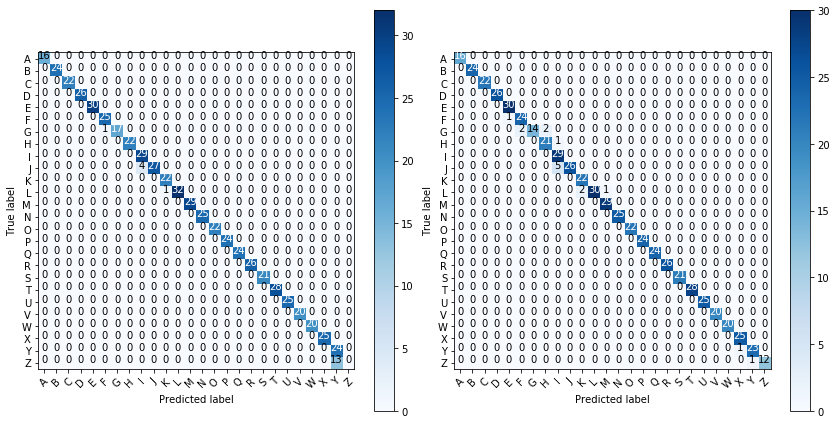

In [25]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
plt.title('Train Confusion Matrix')

plt.subplot(121)
# plt.title("Train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted_train) * 100), 3)) + "%")
plot_confusion_matrix(X_train, Y_train, predicted_train_l2)
print("The train accuracy is: " + str(round((accuracy_score(Y_train, predicted_train_l2) * 100), 3)) + "%\n")

plt.subplot(122)
# plt.title("Train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted_train) * 100), 3)) + "%")
plot_confusion_matrix(X_train, Y_train, predicted_train_l1)
print("The train accuracy is: " + str(round((accuracy_score(Y_train, predicted_train_l1) * 100), 3)) + "%\n")


plt.savefig("./Results/Train")



The validation accuracy is: 95.513%

The validation accuracy is: 96.795%



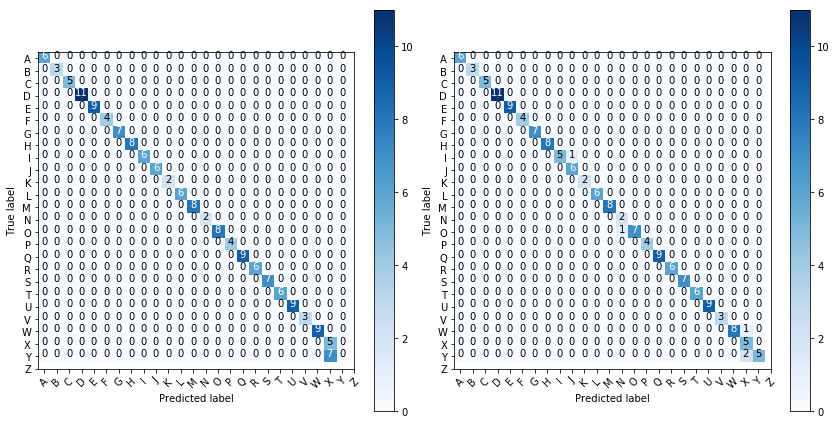

In [27]:
plt.figure(figsize=(12,6))
plt.title('Validation Confusion Matrix')

plt.subplot(121)
#plt.title("Validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted_validation) * 100), 3)) + "%")
plot_confusion_matrix(X_validation, Y_validation, predicted_validation_l2)
print("The validation accuracy is: " + str(round((accuracy_score(Y_validation, predicted_validation_l2) * 100), 3)) + "%\n")

plt.subplot(122)
#plt.title("Validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted_validation) * 100), 3)) + "%")
plot_confusion_matrix(X_validation, Y_validation, predicted_validation_l1)
print("The validation accuracy is: " + str(round((accuracy_score(Y_validation, predicted_validation_l1) * 100), 3)) + "%\n")



plt.savefig("./Results/Validation")
#plt.show()

## Hyperparameters study

This part consist on making a study of the hyperparameters of the KNN model

In [49]:
# Model training and accuracy computation for different k values

def tuning_parameter_new_knn(start_value, end_value):
    values = [i for i in range(start_value, end_value)]
    accs_train = []
    accs_validation  = []

    for neighbors in values:
        
        print neighbors

        prediction_train = []
        prediction_validation = []

        prediction_train = knn.k_nearest_neighbors(X_train, X_train, neighbors, 'l2')
        accs_train.append(accuracy_score(Y_train, prediction_train))

        prediction_validation = knn.k_nearest_neighbors(X_train, X_validation, neighbors, 'l2')
        accs_validation.append(accuracy_score(Y_validation, prediction_validation))

    plt.figure(figsize=(16, 8))

    print("Optimal number for k: " + str(values[np.argmax(accs_validation)]))

    # Draw accuracies as a function of the depth for both trainin and testing sets
    plt.plot(values, accs_train, label = 'Train Accuracy')
    plt.plot(values, accs_validation,  label = 'Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of k neighbors')
    plt.legend()
    plt.xticks(values)
    plt.show()  

26
27
28
29
30
31
32
33
34
35
36
37
38
39
Optimal number for k: 26


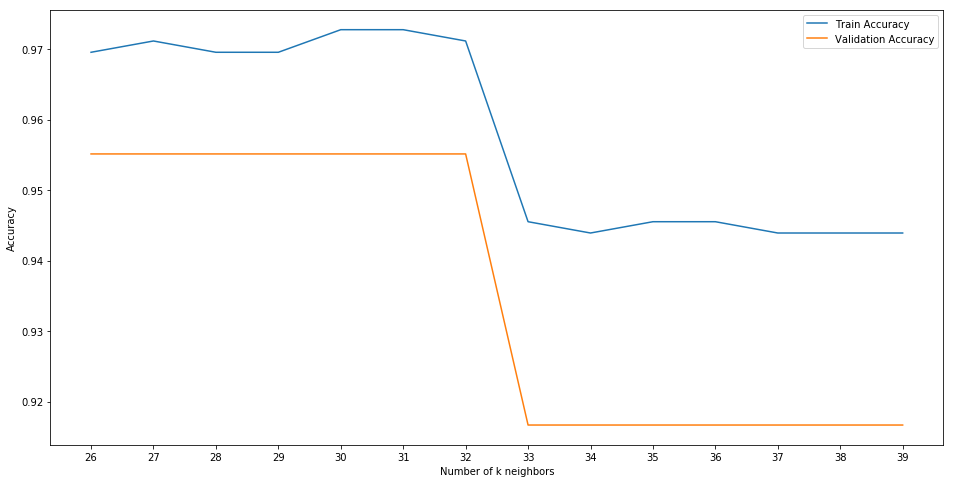

CPU times: user 1min 52s, sys: 1.34 s, total: 1min 53s
Wall time: 1min 51s


In [53]:
%%time 

tuning_parameter_new_knn(26, 40)

## **Best K-Nearest Neighbors model**

Finally after making the study of the hyperparameters we make another study to see the gain in performance

In [33]:
neighbor = 2
norm = 'l2'

In [34]:
%%time 

best_predicted_train = knn_train(neighbor, norm)

Using 2 neighbors
Using the l2 norm

The train accuracy is: 53.707%

CPU times: user 5.73 s, sys: 44.5 ms, total: 5.78 s
Wall time: 5.7 s


In [35]:
print("Test dataset has: " + str(test_set.length) + " letters")

Test dataset has: 208 letters


In [22]:
def knn_test(n_neighbors, norm):  
    #Predict the results of the train dataset
    predicted = knn.k_nearest_neighbors(X_train, X_test, n_neighbors, norm)

    print("The validation accuracy is: " + str(round((accuracy_score(Y_test, predicted) * 100), 3)) + "%\n")

    
    return predicted

In [23]:
%%time 

predicted_test = knn_test(2, 'l1')

The validation accuracy is: 100.0%

CPU times: user 650 ms, sys: 28.2 ms, total: 678 ms
Wall time: 649 ms


In [38]:
def knn_train(n_neighbors, norm):  
    #Predict the results of the train dataset
    predicted = knn.k_nearest_neighbors(X_train, X_train, n_neighbors, norm)

    print("The validation accuracy is: " + str(round((accuracy_score(Y_train, predicted) * 100), 3)) + "%\n")

    
    return predicted

In [39]:
%%time 

predicted_train = knn_train(neighbor, norm)

The validation accuracy is: 53.707%

CPU times: user 6.77 s, sys: 60 ms, total: 6.83 s
Wall time: 6.74 s


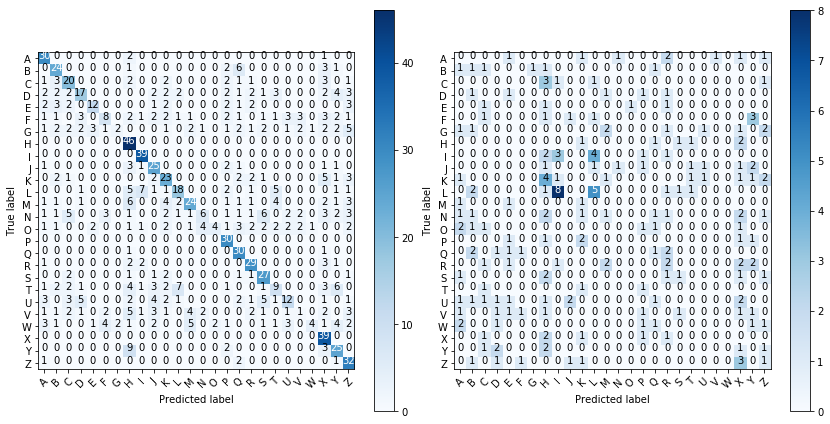

In [40]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_confusion_matrix(X_train, Y_train, predicted_train)

plt.subplot(122)
plot_confusion_matrix(X_test, Y_test, predicted_test)
plt.show()